In [1]:
# While Using Google Colab
#Dataset  : http://cb.lk/covid_19
#!wget http://cb.lk/covid_19
#!unzip covid_19

In [1]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image


In [7]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics = ['accuracy'])



In [8]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [9]:
#Train from scratch

train_datagen = image.ImageDataGenerator(
  rescale=1./255,
  shear_range = 0.2,
  zoom_range=  0.2,
  horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)


In [14]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32 ,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [16]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [17]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32 ,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [18]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
8/8 [==============================] - 15s 2s/step - loss: 1.1679 - accuracy: 0.4883 - val_loss: 0.6855 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 11s 1s/step - loss: 0.6368 - accuracy: 0.6562 - val_loss: 0.5326 - val_accuracy: 0.9333
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 0.4049 - accuracy: 0.8359 - val_loss: 0.2477 - val_accuracy: 0.9333
Epoch 4/10
8/8 [==============================] - 12s 1s/step - loss: 0.2945 - accuracy: 0.8906 - val_loss: 0.1811 - val_accuracy: 0.9667
Epoch 5/10
8/8 [==============================] - 11s 1s/step - loss: 0.2696 - accuracy: 0.9102 - val_loss: 0.0914 - val_accuracy: 0.9667
Epoch 6/10
8/8 [==============================] - 12s 1s/step - loss: 0.2623 - accuracy: 0.9023 - val_loss: 0.1763 - val_accuracy: 0.9667
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 0.2026 - accuracy: 0.9219 - val_loss: 0.1614 - val_accuracy: 0.9667
Epoch 8/10
8/8 [==================

In [19]:
model.save("model_dj.h1")

In [20]:
model.evaluate_generator(train_generator)

[0.1398848295211792, 0.9732142686843872]

In [21]:
model.evaluate_generator(validation_generator)

[0.10384409874677658, 0.9666666388511658]

In [22]:
# Test Images

model = load_model('model_dj.h1')

In [23]:
import os

In [24]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [25]:
y_actual = []
y_test = []

In [26]:
for  i in os.listdir("./CovidDataset/Val/Normal/"):
    img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis =0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)
  

In [27]:
for  i in os.listdir("./CovidDataset/Val/Covid/"):
        img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size=(224,224))
        img = image.img_to_array(img)
        img = np.expand_dims(img,axis =0)
        p = model.predict_classes(img)
        y_test.append(p[0,0])
        y_actual.append(0)

In [28]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)


In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
cm = confusion_matrix(y_actual,y_test)

In [31]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


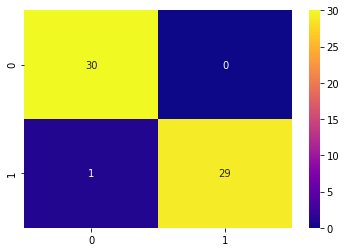

In [32]:
# Class Activationb Map
# Grad-CAM
sns.heatmap(cm, cmap = "plasma" , annot = True)